# Multi-Class Neural Networks with MNIST

## Table of Contents
In this lab, you will use a single layer neural network to classify handwritten digits from the MNIST database.

* Neural Network Module and Training Function
* Make Some Data
* Define the Neural Network, Optimizer, and Train the Model
* Analyze Results

In [14]:
# importing libraries

import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [15]:
import torchvision.datasets as dsets

In [16]:
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

# Helper function for plotting the loss

In [34]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [17]:
# Define a function to plot model parameters

def print_model_parameters(model):
  count = 0
  for element in model.state_dict():
    count += 1
    if count % 2 != 0:
      print('The following are the parameters for the layer', count // 2 +1)
    if element.find('bias') != -1:
      print('The size of bias: ', model.state_dict()[element].size())
    else:
      print('The size of weights: ', model.state_dict()[element].size())
    

Define the Neural Network module or class

In [18]:
# Define a function to display data

def show_data(data_sample):
  plt.imshow(data_sample.numpy().reshape(28, 28), cmap ='gray')
  plt.show()

# Neural Network Module and Training function

In [19]:
# Define the neural network module or class
class Net(nn.Module):
  #constructor
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x


Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 

In [38]:
# Define a training fucntion to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs =100):
  i = 0
  useful_stuff = {'training_loss': [], 'validation_accuracy': []}
  for epoch in range(epochs):
    for i, (x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z= model(x.view(-1, 28 * 28))
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      #loss for every iteration
      useful_stuff['training_loss'].append(loss.data.item())
    correct = 0
    for x, y in validation_loader:
      #validation
      z = model(x.view(-1, 28 * 28))
      _, label = torch.max(z, 1)
      correct += (label == y).sum().item()
    accuracy = 100 * (correct / len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  return useful_stuff


# Make some data

Load the training dataset by setting the parameters `train` to `True` and convert it to a tensor by placing a transform object in the argument `transform`

In [39]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train =True, download =True, transform = transforms.ToTensor())

Load the testing dataset by setting the parameters `train` to `False` and convert it to a tensor by placing a transform object in the argument `transform`

In [40]:
# Creating validation dataset

validation_dataset = dsets.MNIST(root ='./data', train=False, download=True, transform = transforms.ToTensor())

In [41]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

Create the Criterion function

In [42]:
# Create criterion funcion
criterion = nn.CrossEntropyLoss()

In [43]:
# Create data loader for both train dataset and validataion dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle =True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size =5000, shuffle = False)

# Define the Neural Network, Optimizer and Train the model

In [44]:
# Create the  model with 100 neurons

In [45]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [46]:
#Print the parameters for mod

print_model_parameters(model)

The following are the parameters for the layer 1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer 2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


Define the Optimizer object with a learning rate of 0.01

In [47]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [53]:
# train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs =100)

# Analyze Results

plot the training total loss or cost for every iteration and plot the training accuracy for every epoch

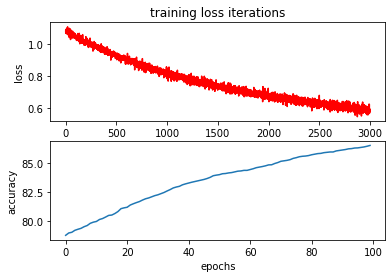

In [54]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

Plot the first five misclassified samples

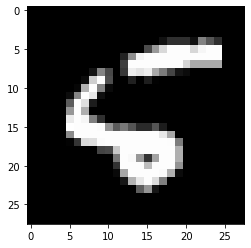

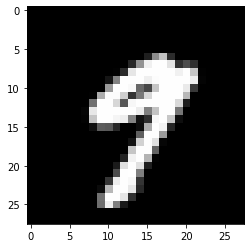

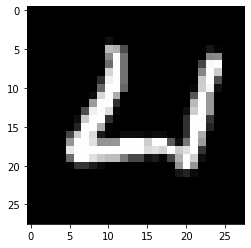

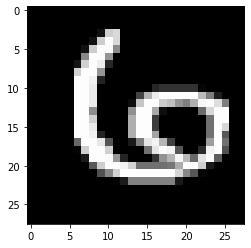

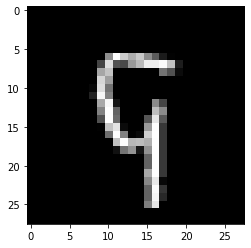

In [56]:
count = 0
for x, y in validation_dataset:
  z =  model(x.reshape(-1, 28 *28))
  _, yhat = torch.max(z, 1)
  if yhat != y:
    show_data(x)
    count += 1
  if count >= 5:
    break